In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import linear_model, metrics 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# load the boston dataset 
dataframe =  pd.read_csv('heart.csv')

#print(dataframe.head())

# defining feature matrix(X) and response vector(y) 
X = dataframe.iloc[:,:-1] 
y = dataframe.iloc[:,-1:]


In [8]:
#convert categorical to numeric
labelencoder_X=LabelEncoder()
z = X.iloc[:,-1:]
X.iloc[:,-1:] = labelencoder_X.fit_transform(z.values.ravel()) #array.ravel is equivalent to reshape(-1, order=order) 

#z score normalization
scaller = StandardScaler()
X = scaller.fit_transform(X)

# splitting X and y into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

In [5]:
# create linear regression object 
reg = linear_model.LinearRegression() 

# train the model using the training sets 
reg.fit(X_train, y_train) 

# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 


Coefficients: 
 [[-0.01988385  0.03751326  0.06049251  0.0455686   0.01129942  0.00964204
  -0.00590382 -0.06753739  0.04679766  0.08674615  0.04398229  0.13220616
   0.02220608]]
Variance score: 0.454453412284089


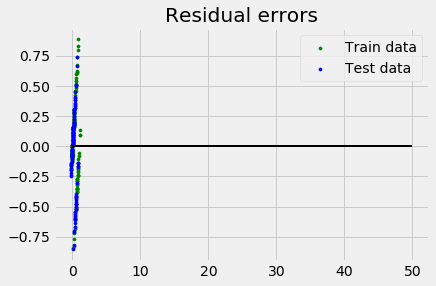

In [6]:
# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 